In [1]:
# The temperature signal is lowpass filtered using a
# moving average filter during the acquisition.
# The cutoff of that filter is still pretty high for
# a temperature signal, we're going to add another FIR
# filter with the cutoff in the .5Hz range.

from pylab import *
from scipy import signal

%matplotlib inline

In [8]:
# Some helpers for plotting:
def normalize_coeff(coeff):
    return(np.array(coeff)/np.sum(coeff))

def plot_freq_FIR(coeff):
    # Plot the frequency response of the FIR filters
    # specified by $coeff. If $coeff is a list, plot
    # the frequency responses for each FIR filter
    # in one plot.

    if type(coeff[0]) not in (list, np.ndarray):
        coeff = [coeff]
    fig = plt.figure()
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [rad/sample]')
    for b in coeff:
        b = normalize_coeff(b)
        w, h = signal.freqz(b)
        plt.plot(w, 20*np.log10(np.abs(h)))
    plt.show()

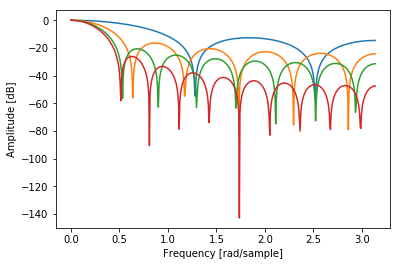

In [25]:
samp_freq = 10 # control thread runs every 100ms

num_coeffs = [5, 11, 15, 21]

fir_coeffs = [signal.firls(numtaps, [0, .5, .5, samp_freq/2], [1, 1, 0, 0], nyq=samp_freq/2) for numtaps in num_coeffs]
#fir_coeffs
plot_freq_FIR(fir_coeffs)

In [26]:
# 15 taps sould be enough.
coeffs = fir_coeffs[2]
coeffs

array([ 0.0367883 ,  0.05045512,  0.06366198,  0.07568267,  0.08583937,
        0.09354893,  0.09836316,  0.1       ,  0.09836316,  0.09354893,
        0.08583937,  0.07568267,  0.06366198,  0.05045512,  0.0367883 ])